In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv ("D:\players_20.csv")

In [3]:
data.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [4]:
for i in data.columns:
    print(i,end =" , ")

sofifa_id , player_url , short_name , long_name , age , dob , height_cm , weight_kg , nationality , club , overall , potential , value_eur , wage_eur , player_positions , preferred_foot , international_reputation , weak_foot , skill_moves , work_rate , body_type , real_face , release_clause_eur , player_tags , team_position , team_jersey_number , loaned_from , joined , contract_valid_until , nation_position , nation_jersey_number , pace , shooting , passing , dribbling , defending , physic , gk_diving , gk_handling , gk_kicking , gk_reflexes , gk_speed , gk_positioning , player_traits , attacking_crossing , attacking_finishing , attacking_heading_accuracy , attacking_short_passing , attacking_volleys , skill_dribbling , skill_curve , skill_fk_accuracy , skill_long_passing , skill_ball_control , movement_acceleration , movement_sprint_speed , movement_agility , movement_reactions , movement_balance , power_shot_power , power_jumping , power_stamina , power_strength , power_long_shots , 

In [5]:
data.shape

(18278, 104)

In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram     

In [7]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [8]:
drop_column = ['sofifa_id','player_url']
data.drop(columns=drop_column,inplace=True)

### Fixing the column values in ['lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [9]:
def parse_and_sum(value):
    if pd.isna(value):
        return value  # Ignore NaN values
    try:
        parts = value.split('+')
        return int(parts[0]) + int(parts[1])
    except:
        return valu

In [10]:
column_fix = ['lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[column_fix] = data[column_fix].applymap(parse_and_sum)
    

C:\Users\rathe\AppData\Local\Temp\ipykernel_23424\253316298.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[column_fix] = data[column_fix].applymap(parse_and_sum)


In [11]:
data.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,...,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,...,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,...,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


## Finding the max and min age

In [12]:
data["age"].isnull().sum()

0

In [13]:
max_age = data['age'].max()
min_age = data['age'].min()

In [14]:
print(f"The age of oldest player : {max_age}")
print(f"The age of Youngest player : {min_age}")

The age of oldest player : 42
The age of Youngest player : 16


Text(0, 0.5, 'Number of players')

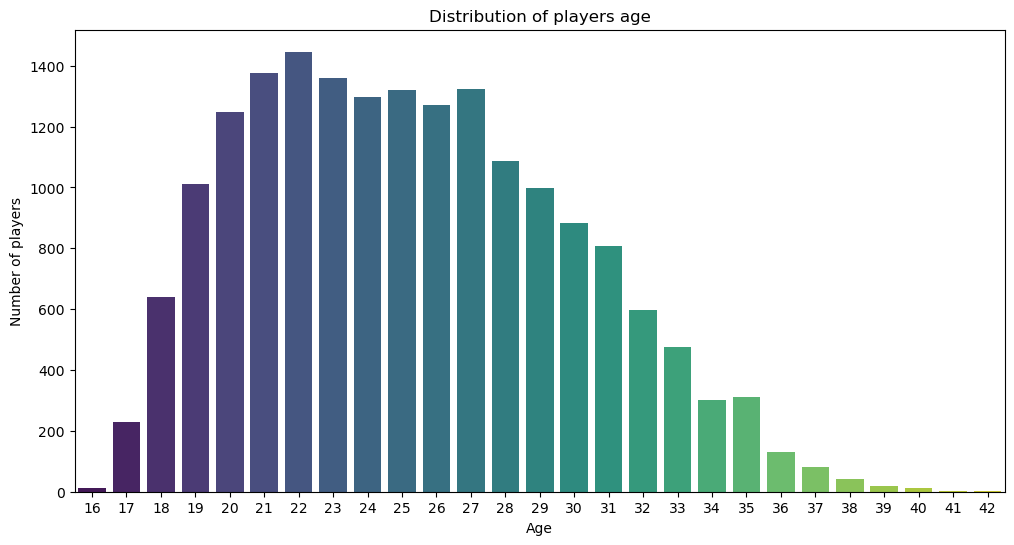

In [15]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'age', data = data, palette = 'viridis')
plt.title('Distribution of players age')
plt.xlabel('Age')
plt.ylabel('Number of players')


## Finding The Youngest and oldest players

In [16]:
yongest_player = data[data['age'] == min_age]
yongest_player['dob'] = pd.to_datetime(yongest_player['dob'])
yongest_player = yongest_player.loc[yongest_player['dob'].idxmax()]
yongest_player[['short_name','nationality' ,'age','dob']]

C:\Users\rathe\AppData\Local\Temp\ipykernel_23424\3610785808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yongest_player['dob'] = pd.to_datetime(yongest_player['dob'])


short_name             S. Anderson
nationality          United States
age                             16
dob            2002-08-08 00:00:00
Name: 17782, dtype: object

In [17]:
data.loc[data['age'] == min_age]


,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4764,A. Hložek,Adam Hložek,16,2002-07-25,185,80,Czech Republic,Sparta Praha,70,86,...,54.0,52.0,52.0,52.0,54.0,51.0,48.0,48.0,48.0,51.0
6630,Fábio Silva,Fábio Daniel Soares Silva,16,2002-07-19,185,75,Portugal,FC Porto,68,85,...,45.0,42.0,42.0,42.0,45.0,43.0,40.0,40.0,40.0,43.0
12158,E. Millot,Enzo Millot,16,2002-07-17,175,65,France,AS Monaco,63,86,...,60.0,58.0,58.0,58.0,60.0,58.0,53.0,53.0,53.0,58.0
12160,S. Esposito,Sebastiano Esposito,16,2002-07-02,186,75,Italy,Inter,63,85,...,43.0,42.0,42.0,42.0,43.0,41.0,39.0,39.0,39.0,41.0
14626,A. Velasco,Alan Velasco,16,2002-07-27,167,63,Argentina,Independiente,60,83,...,57.0,56.0,56.0,56.0,57.0,57.0,52.0,52.0,52.0,57.0
17614,D. Obbekjær,Daniel Obbekjær,16,2002-07-16,193,86,Denmark,Odense Boldklub,53,71,...,46.0,50.0,50.0,50.0,46.0,48.0,53.0,53.0,53.0,48.0
17782,S. Anderson,Sebastian Anderson,16,2002-08-08,175,64,United States,Colorado Rapids,52,75,...,52.0,50.0,50.0,50.0,52.0,52.0,50.0,50.0,50.0,52.0
17827,D. Burns,Darragh Burns,16,2002-08-06,176,62,Northern Ireland,St. Patrick's Athletic,52,69,...,45.0,41.0,41.0,41.0,45.0,44.0,38.0,38.0,38.0,44.0
18031,O. Stefánsson,Oliver Stefánsson,16,2002-08-03,190,75,Iceland,IFK Norrköping,51,64,...,45.0,47.0,47.0,47.0,45.0,48.0,52.0,52.0,52.0,48.0
18171,J. Starbuck,Joseph Starbuck,16,2002-08-03,174,69,England,Grimsby Town,49,72,...,46.0,45.0,45.0,45.0,46.0,45.0,42.0,42.0,42.0,45.0


##### We can see that there are 12 players at the age of 16 among them S.Anderson of United States is the youngest

In [18]:
data.loc[data['age'] == max_age]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
11832,C. Muñoz,Cristian Fernando Muñoz Hoffman,42,1977-07-01,177,73,Argentina,CD Universidad de Concepción,64,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13003,H. Sulaimani,Hussein Omar Abdul Ghani Sulaimani,42,1977-01-21,173,70,Saudi Arabia,Al Ahli,63,63,...,64.0,68.0,68.0,68.0,64.0,64.0,68.0,68.0,68.0,64.0


##### Here we can see that C.Munoz of Argentina is the oldest player

## height

c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Players')

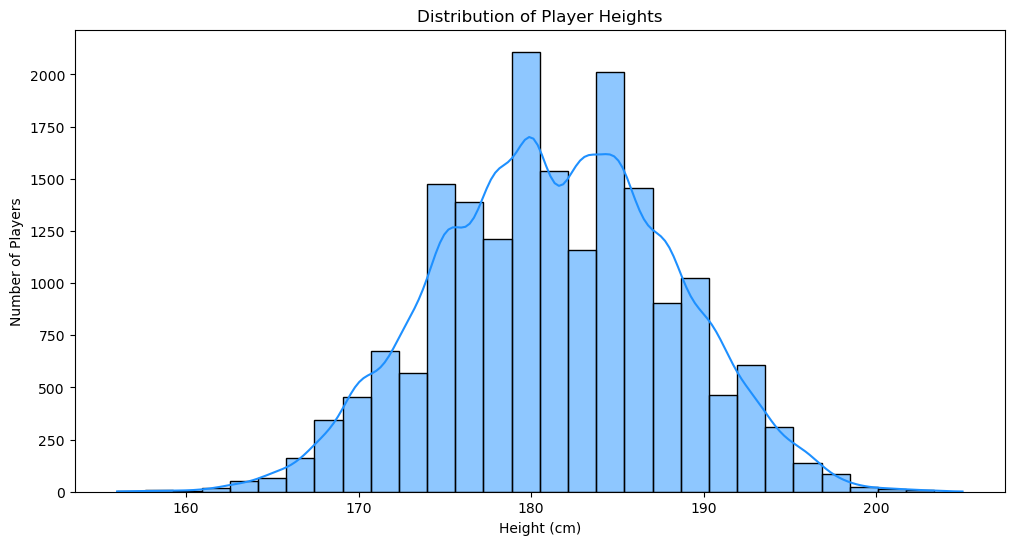

In [19]:
plt.figure(figsize=(12, 6))

# Create a histogram for player heights
sns.histplot(data['height_cm'], bins=30, kde=True, color='dodgerblue')

# Set the title and labels
plt.title('Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')


In [20]:
max_height = data['height_cm'].max()
min_height = data['height_cm'].min()

In [21]:
# Tallest player
data.loc[data['height_cm'] == max_height]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
9208,T. Holý,Tomáš Holý,27,1991-12-10,205,102,Czech Republic,Ipswich Town,66,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Shortest player
data.loc[data['height_cm'] == min_height]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4829,N. Barrios,Cristian Nahuel Barrios,21,1998-05-07,156,58,Argentina,San Lorenzo de Almagro,70,80,...,58.0,54.0,54.0,54.0,58.0,56.0,46.0,46.0,46.0,56.0


## Weight ( Finding highest and lowest weight)

c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Players')

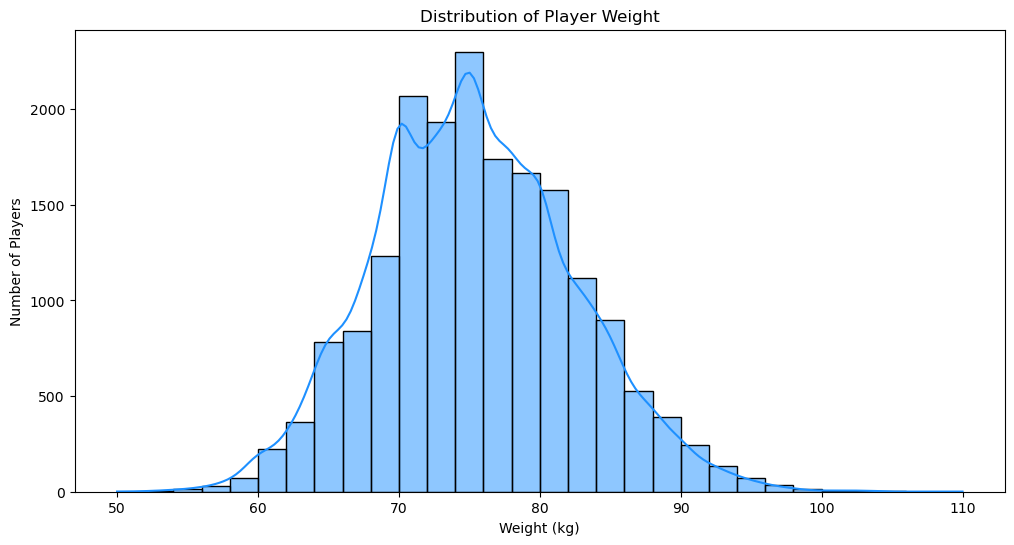

In [23]:
plt.figure(figsize=(12, 6))

# Create a histogram for player heights
sns.histplot(data['weight_kg'], bins=30, kde=True, color='dodgerblue')

# Set the title and labels
plt.title('Distribution of Player Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Players')

In [24]:
max_weight = data['weight_kg'].max()
min_weight = data['weight_kg'].min()

In [25]:
# max weight
data.loc[data['weight_kg'] == max_weight]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10693,A. Akinfenwa,Adebayo Akinfenwa,37,1982-05-10,178,110,England,Wycombe Wanderers,65,65,...,46.0,51.0,51.0,51.0,46.0,45.0,50.0,50.0,50.0,45.0


In [26]:
# min weight
data.loc[data['weight_kg'] == min_weight]

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13070,B. Al Mutairi,Bandar Al Mutairi,29,1990-03-14,168,50,Saudi Arabia,Al Fayha,63,63,...,64.0,58.0,58.0,58.0,64.0,63.0,58.0,58.0,58.0,63.0


## Nationality

In [27]:
nationality_count = data['nationality'].value_counts()
top_10_nationalities = nationality_count.head(10).index
filtered_data = data[data['nationality'].isin(top_10_nationalities)]


Text(0, 0.5, 'Number of players')

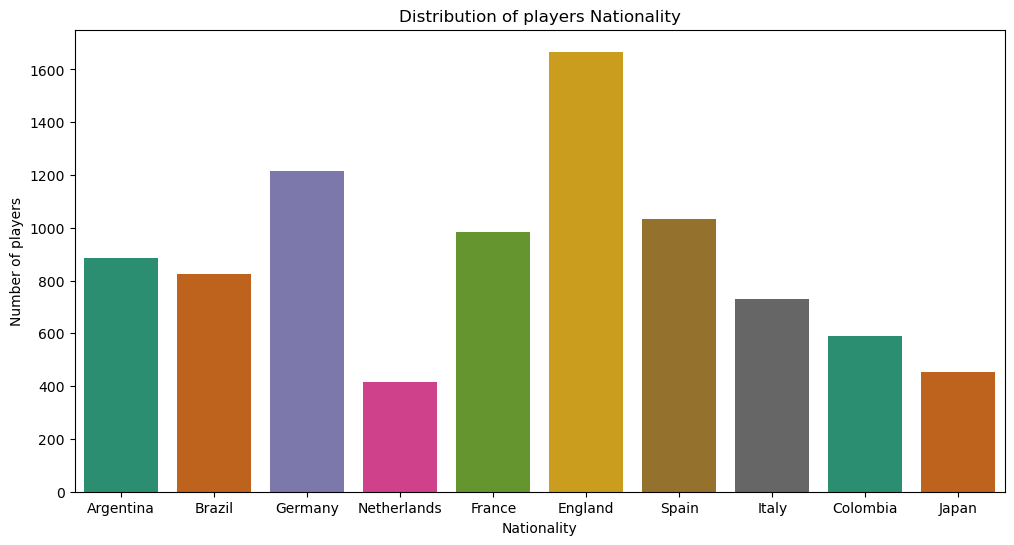

In [28]:
plt.figure(figsize=(12,6))

sns.countplot(x = 'nationality', data =filtered_data, palette = 'Dark2')
plt.title('Distribution of players Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of players')


In [29]:
#### Messi vs Ronaldo comparison

players = data[data['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])]
attributes = ['short_name', 'overall', 'potential', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

players[attributes]

,short_name,overall,potential,age,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,94,94,32,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,93,93,34,90.0,93.0,82.0,89.0,35.0,78.0


Here we can see that England is at first Germany at second and Spine is in the third position slightly above France.

## Over all Rating

lets find the players with best over all ratings

In [30]:
top_10_players = data.sort_values(by = 'overall', ascending= False).head(10)

In [31]:
print(top_10_players[['short_name', 'nationality', 'club', 'overall']])

          short_name  nationality                 club  overall
0           L. Messi    Argentina         FC Barcelona       94
1  Cristiano Ronaldo     Portugal             Juventus       93
2          Neymar Jr       Brazil  Paris Saint-Germain       92
3           J. Oblak     Slovenia      Atlético Madrid       91
4          E. Hazard      Belgium          Real Madrid       91
5       K. De Bruyne      Belgium      Manchester City       91
6      M. ter Stegen      Germany         FC Barcelona       90
7        V. van Dijk  Netherlands            Liverpool       90
8          L. Modrić      Croatia          Real Madrid       90
9           M. Salah        Egypt            Liverpool       90


 ### Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving

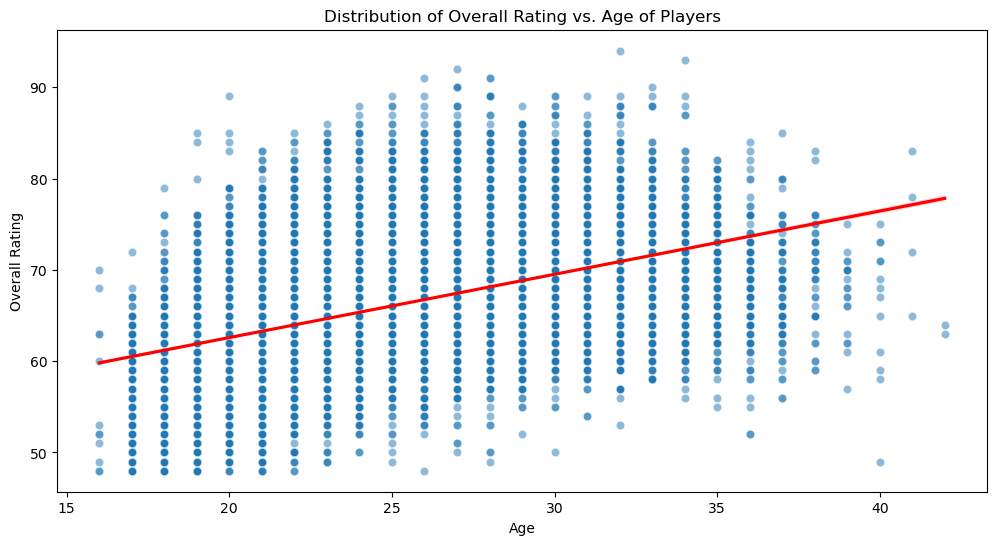

In [32]:
plt.figure(figsize=(12,6))

# Scatter plot with regression line
sns.scatterplot(x='age', y='overall', data=data, alpha=0.5)
sns.regplot(x='age', y='overall', data=data, scatter=False, color='red')

plt.title('Distribution of Overall Rating vs. Age of Players')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

The regression line starts to decline is the age after which players generally stop improving. Here players tend to peak around their mid-20s to early 30s. And they stope improving after their mid-30s

 ### Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


In [33]:
# Filter the data for offensive players
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = data[data['team_position'].isin(offensive_positions)]

# Calculate the average release clause for each position
average_wage_eur = offensive_players.groupby('team_position')['wage_eur'].mean().reset_index()

# Sort the data for better visualization
average_wage_eur = average_wage_eur.sort_values(by='wage_eur', ascending=False)

print(average_wage_eur)

  team_position      wage_eur
0            LW  23308.641975
1            RW  21024.844720
2            ST  16451.965066


Text(0, 0.5, 'Average Wage (EUR)')

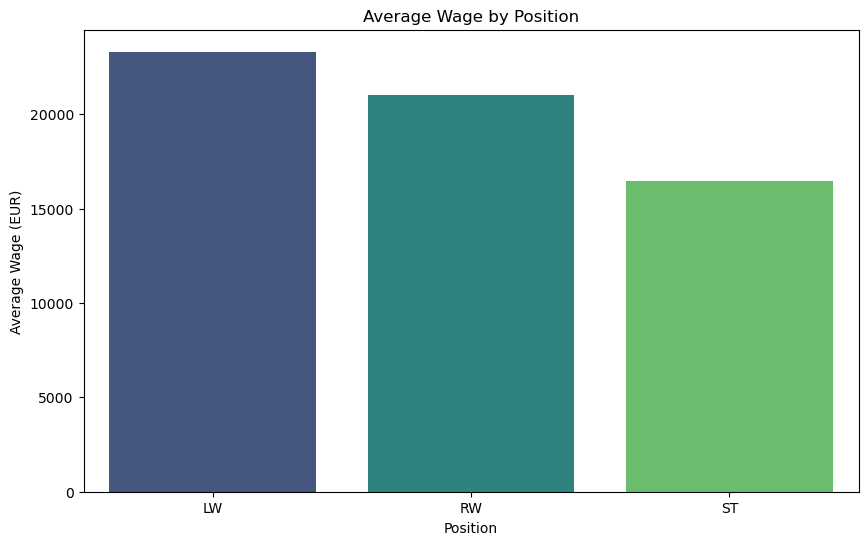

In [34]:
plt.figure(figsize=(10,6))

sns.barplot(x='team_position', y='wage_eur', data=average_wage_eur,palette='viridis')

plt.title("Average Wage by Position")
plt.xlabel("Position")
plt.ylabel("Average Wage (EUR)")

In [35]:
positions_of_interest = ['ST', 'LW', 'RW']
filtered_data = data[data['team_position'].isin(positions_of_interest)]

# Count the preferred foot for each position
preferred_foot_counts = filtered_data.groupby(['team_position', 'preferred_foot']).size().reset_index(name='counts')
print(preferred_foot_counts)


  team_position preferred_foot  counts
0            LW           Left      32
1            LW          Right     130
2            RW           Left      65
3            RW          Right      96
4            ST           Left      60
5            ST          Right     398


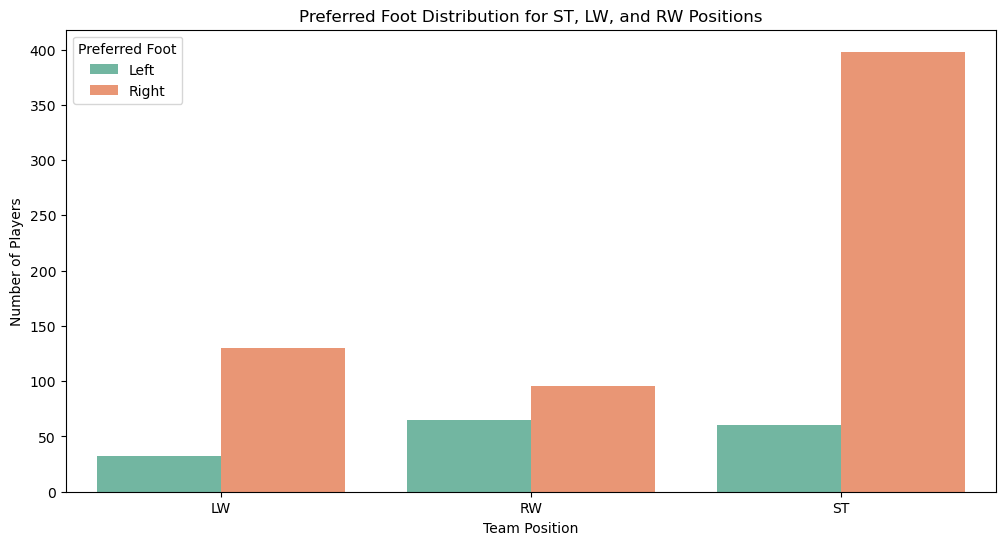

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='team_position', y='counts', hue='preferred_foot', data=preferred_foot_counts, palette='Set2')
plt.title('Preferred Foot Distribution for ST, LW, and RW Positions')
plt.xlabel('Team Position')
plt.ylabel('Number of Players')
plt.legend(title='Preferred Foot')
plt.show()

In [37]:
foot_count = data['preferred_foot'].value_counts()

print(foot_count)

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64


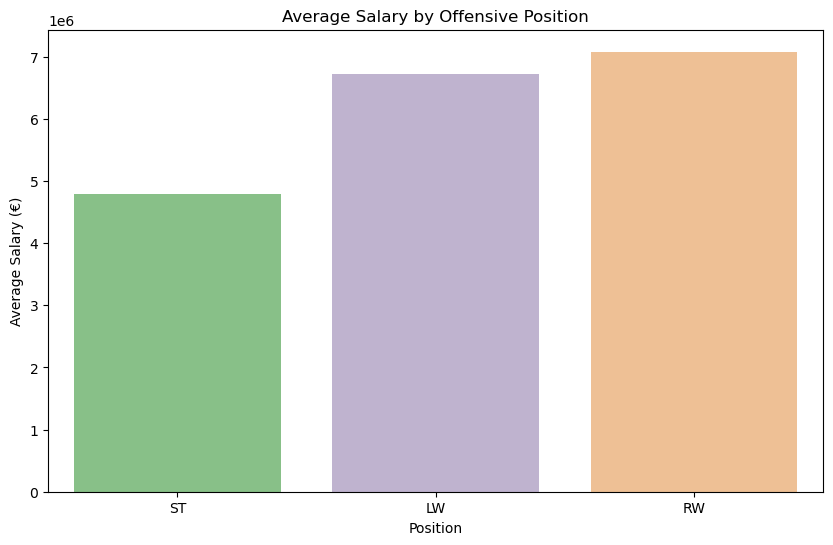

In [38]:
# Filter data for offensive players
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = data[data['team_position'].isin(offensive_positions)]

# Group by position and calculate average salary
avg_salary_by_position = offensive_players.groupby('team_position')['value_eur'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_position.index, y=avg_salary_by_position.values, palette='Accent')
plt.title('Average Salary by Offensive Position')
plt.xlabel('Position')
plt.ylabel('Average Salary (€)')
plt.show()


Here when we consider wage the left wing players are getting paid more. However when we consider the value of players the right wing players have more value. A reason can be LW players mostly use right foot where as RW players using left foot is comparatively low and the players using left foot is low in general. This can be a reason why they are slightly more valuable.

### Most valuable teams

In [39]:
# Most valuable clubs
club_values = data.groupby('club')['value_eur'].sum()

top_20_clubs = club_values.sort_values(ascending=False).head(20)

print(top_20_clubs)

club
Real Madrid            897850000
FC Barcelona           869300000
Manchester City        845745000
Juventus               735475000
Liverpool              693265000
FC Bayern München      688775000
Paris Saint-Germain    687550000
Tottenham Hotspur      649850000
Atlético Madrid        590375000
Borussia Dortmund      532325000
Napoli                 518275000
Chelsea                504970000
Manchester United      501675000
Arsenal                454860000
Inter                  448610000
Valencia CF            406355000
Lazio                  384745000
Milan                  384060000
RB Leipzig             382760000
Bayer 04 Leverkusen    359400000
Name: value_eur, dtype: int64


Text(0, 0.5, 'Club')

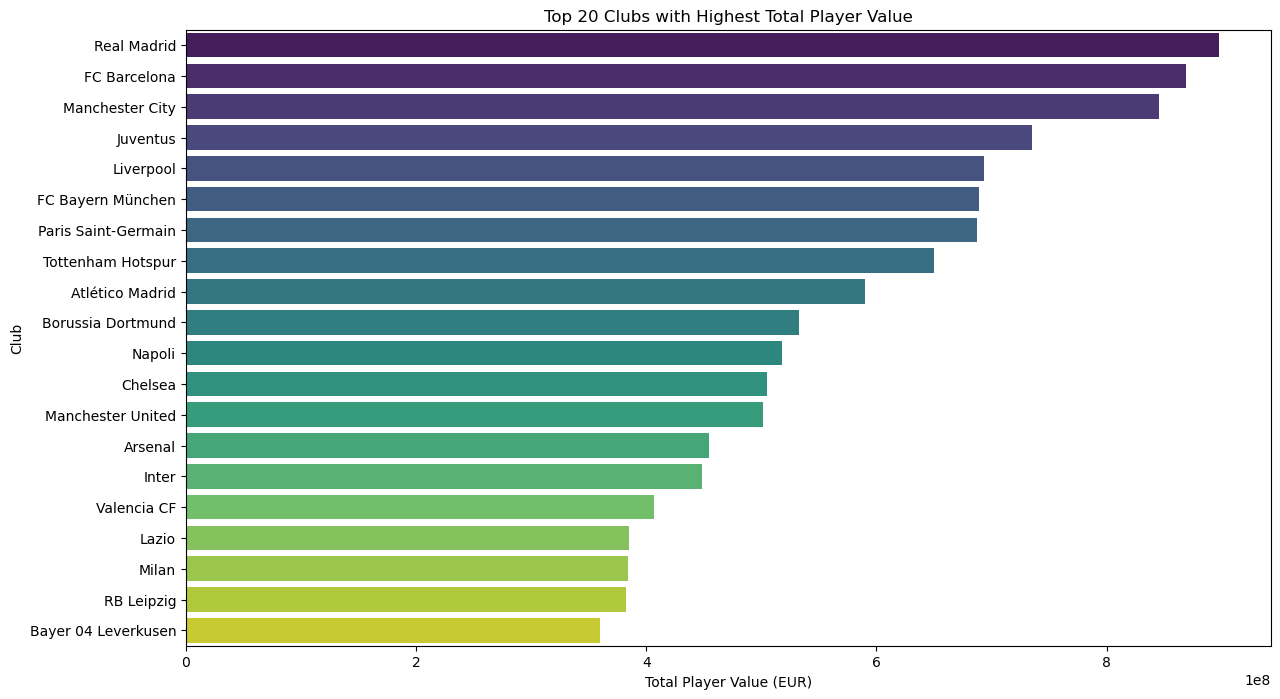

In [40]:
top_20_clubs_df = top_20_clubs.reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='value_eur', y='club', data=top_20_clubs_df, palette='viridis')


plt.title('Top 20 Clubs with Highest Total Player Value')
plt.xlabel('Total Player Value (EUR)')
plt.ylabel('Club')

In [41]:
# Most valuable Nations
nation_values = data.groupby('nationality')['value_eur'].sum()

top_20_nations = nation_values.sort_values(ascending=False).head(20)

print(top_20_nations)

nationality
Spain          4735490000
Brazil         3728055000
France         3696205000
Germany        3103520000
Argentina      3026500000
England        2695050000
Italy          2154825000
Portugal       1682470000
Netherlands    1430265000
Belgium        1236365000
Colombia       1030300000
Uruguay         687565000
Mexico          623030000
Denmark         612620000
Croatia         603995000
Serbia          579490000
Turkey          566915000
Austria         549155000
Switzerland     530490000
Poland          493435000
Name: value_eur, dtype: int64


Text(0, 0.5, 'Club')

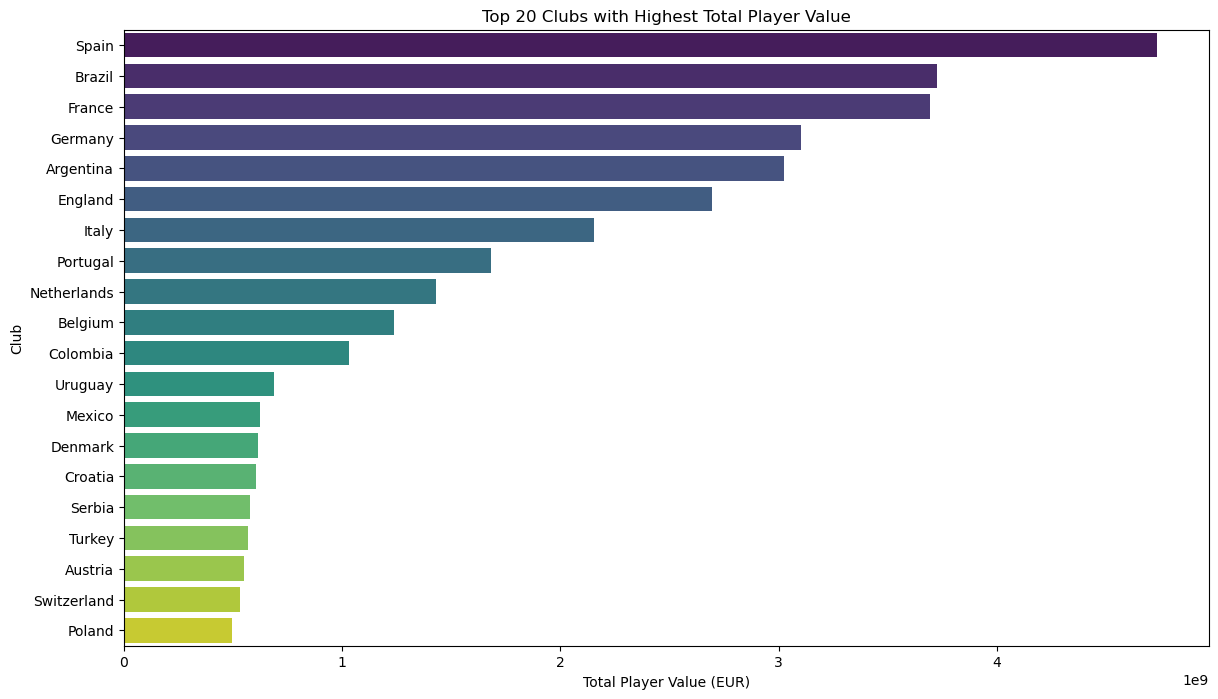

In [42]:
top_20_nations_df = top_20_nations.reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='value_eur', y='nationality', data=top_20_nations_df, palette='viridis')


plt.title('Top 20 Clubs with Highest Total Player Value')
plt.xlabel('Total Player Value (EUR)')
plt.ylabel('Club')

# Part 2


## Clustering football players based on their attributes.

In [80]:
selected_features = ['shooting', 'passing', 'dribbling', 'defending']

data_cleaned = data[selected_features].dropna()

In [81]:
# Normalizing 

scalar = StandardScaler()
normalized_data = scalar.fit_transform(data_cleaned)

In [82]:
# K-Means Clustering

inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\clust

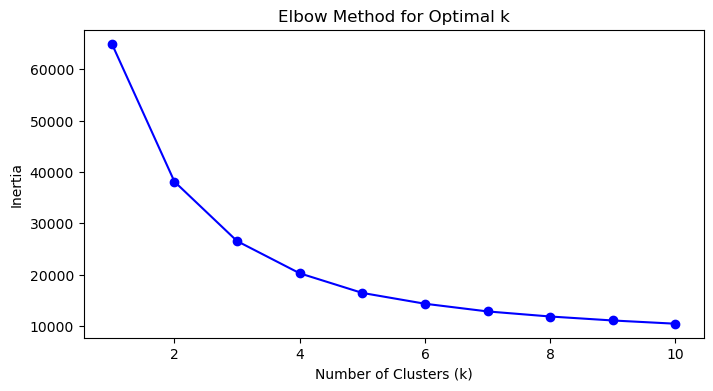

In [83]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [84]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k,random_state=0)
clusters = kmeans.fit_predict(normalized_data)

data_cleaned['cluster'] = clusters

c:\Users\rathe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


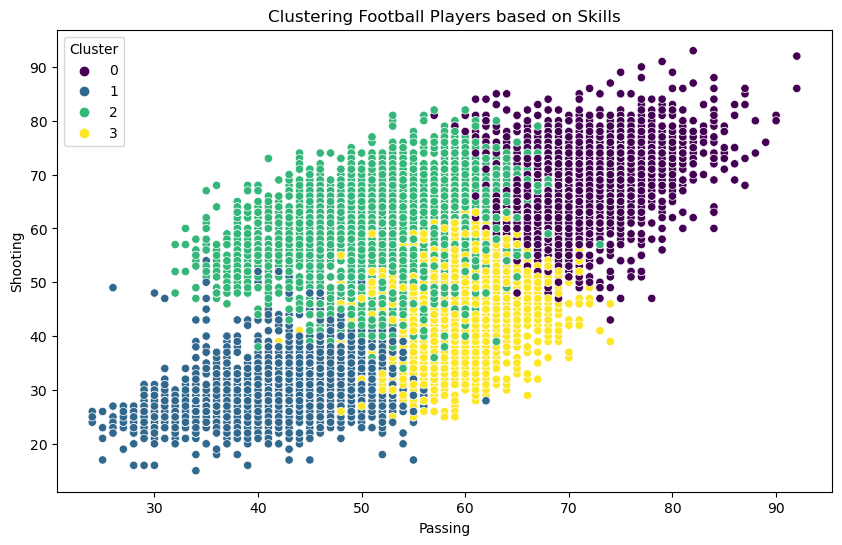

In [85]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passing', y='shooting', hue='cluster', data=data_cleaned, palette='viridis')
plt.title('Clustering Football Players based on Skills')
plt.xlabel('Passing')
plt.ylabel('Shooting')
plt.legend(title='Cluster')
plt.show()

In [86]:
cluster_means = data_cleaned.groupby('cluster').mean()

print(cluster_means)

          shooting    passing  dribbling  defending
cluster                                            
0        65.916435  69.478349  73.192960  54.624209
1        31.622835  43.432662  46.549664  60.758218
2        59.732175  53.685921  63.959161  30.458258
3        46.687401  58.508347  61.892488  62.548688


#### Interpretation of Clusters:
Cluster 0:

- Shooting: 65.92
- Passing: 69.48
- Dribbling: 73.19
- Defending: 54.62
##### Description: This cluster has high values for passing and dribbling, making it likely composed of midfielders or attacking midfielders who excel in creating plays and dribbling past opponents. Their shooting is also relatively high, suggesting these players can contribute to scoring as well.

Cluster 1:

- Shooting: 31.62
- Passing: 43.43
- Dribbling: 46.55
- Defending: 60.76
##### Description: This cluster has lower values for shooting, passing, and dribbling but higher defending scores. It likely includes defensive players such as center-backs and defensive midfielders who focus on stopping opponents rather than attacking.

Cluster 2:

- Shooting: 59.73
- Passing: 53.69
- Dribbling: 63.96
- Defending: 30.46
##### Description: This cluster has moderate shooting and passing skills and high dribbling but low defending. These players are likely forwards or wingers who focus on attacking and dribbling past defenders.

Cluster 3:

- Shooting: 46.69
- Passing: 58.51
- Dribbling: 61.89
- Defending: 62.55
##### Description: This cluster shows balanced skills with decent values in all attributes, including defending. These players might be versatile midfielders or full-backs who can contribute to both defense and offense.

c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rathe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

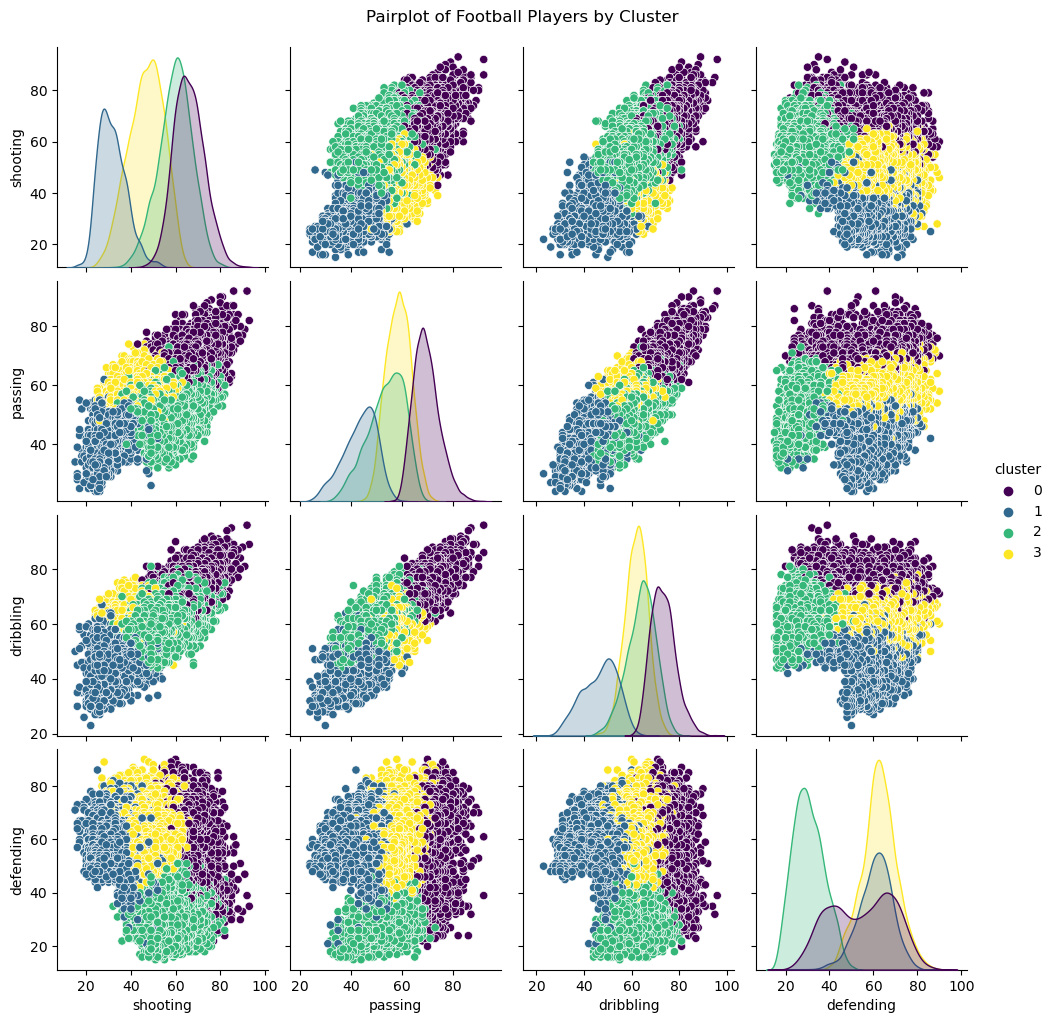

In [87]:
# Plot pairplot of the clustered data
sns.pairplot(data_cleaned, hue='cluster', palette='viridis')
plt.suptitle('Pairplot of Football Players by Cluster', y=1.02)
plt.show()

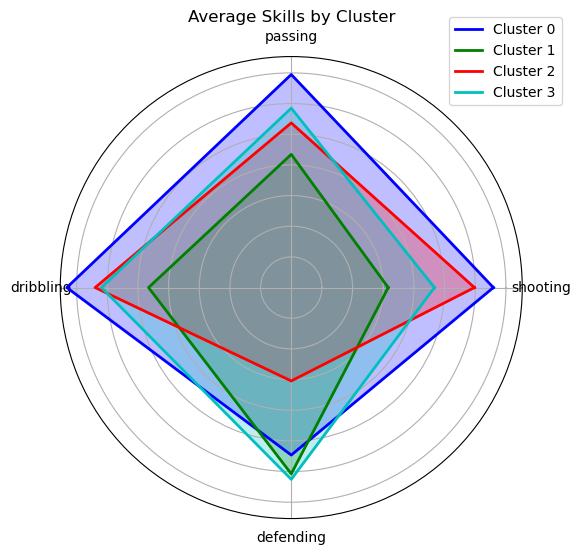

In [88]:

# Function to create a radar chart
def create_radar_chart(data, attributes, title, colors):
    num_vars = len(attributes)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for idx, (name, row) in enumerate(data.iterrows()):
        values = row[attributes].tolist()
        values += values[:1]
        ax.plot(angles, values, color=colors[idx], linewidth=2, linestyle='solid', label=f'Cluster {int(name)}')
        ax.fill(angles, values, color=colors[idx], alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title(title)
    plt.show()

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c']

# Create radar chart
create_radar_chart(cluster_means, selected_features, 'Average Skills by Cluster', colors)


### Summary:
- Cluster 0: Likely includes midfielders or attacking midfielders.
- Cluster 1: Likely includes defensive players.
- Cluster 2: Likely includes forwards or wingers.
- Cluster 3: Likely includes versatile midfielders or full-backs.


By clustering football players based on their attributes, you can better understand the distinct skill sets and characteristics of different groups of players, which can be useful for various analytical purposes.

### Final Thoughts
The clustering analysis has successfully grouped football players into distinct clusters based on their attributes. The grouped bar plot highlights the unique skill sets of each cluster, helping to identify the typical roles these players might play on the field. This analysis can be valuable for team formation strategies, player scouting, and understanding the distribution of skills among football players.